# **INSTALACAO DE BIBLIOTECAS**

In [ ]:
!pip install ydata-profiling sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00


# **BIBLIOTECAS**

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Alterandos configurações originais do pandas**

In [ ]:
# Configurar o Pandas para não usar notação científica para floats e exibir com 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
#pd.reset_option('display.width')
#pd.reset_option('display.max_colwidth')

# **FUNÇÕES**

In [ ]:
# Criar variável para metadados
# (nomes das colunas, tipos, quantidade de nulos, percentual de nulos, cardinalidade)

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
#gera gráfico box plot para variáveis numéricas:

def boxplots_var_num(dataframe):
    """
    Plota boxplots para todas as variáveis numéricas do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas, incluindo Int64 for nullable integers
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64', 'Int64']).columns

    n_numeric_cols = len(numeric_columns)
    if n_numeric_cols == 0:
        print("No numeric columns to plot.")
        return

    ncols = 3
    nrows = n_numeric_cols // ncols + (n_numeric_cols % ncols > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))

    # Flatten axes array for easier iteration, handling single subplot case
    # If there's only one subplot (n_numeric_cols == 1), axes will be a single Axes object
    # If there are multiple subplots, axes will be a NumPy array (1D or 2D)
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else np.array([axes])

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes_flat[i], color="skyblue")
        axes_flat[i].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes_flat[i].set_ylabel('')

    # Remove gráficos vazios (se houver)
    # Iterate over the flattened axes_flat to remove unused subplots
    for j in range(i + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Boxplots", fontsize=20, fontweight='bold', y=1.00)

In [ ]:
#gera gráfico histograma para variáveis numéricas:

def histograms_var_num(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas, incluindo Int64 for nullable integers
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64', 'Int64']).columns

    n_numeric_cols = len(numeric_columns)
    if n_numeric_cols == 0:
        print("No numeric columns to plot.")
        return

    ncols = 3
    nrows = n_numeric_cols // ncols + (n_numeric_cols % ncols > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))

    # Flatten axes array for easier iteration, handling single subplot case
    # If there's only one subplot (n_numeric_cols == 1), axes will be a single Axes object
    # If there are multiple subplots, axes will be a NumPy array (1D or 2D)
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else np.array([axes])

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes_flat[i], color="skyblue", bins=30, kde=True)
        axes_flat[i].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes_flat[i].set_ylabel('Frequência')
        axes_flat[i].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    # Iterate over the flattened axes_flat to remove unused subplots
    for j in range(i + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.00)

In [ ]:
#grafico de barras:

def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(12, 4 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
#gerando graficos de barras empilhadas
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat_vs_target_cutoff(dataframe, target_column, cutoff=10):
    """
    Plota gráficos de barras para analisar as variáveis categóricas em relação ao target,
    limitando o número de variáveis de acordo com um valor de cutoff.

    :param dataframe: DataFrame contendo as variáveis categóricas e a coluna target.
    :param target_column: Nome da coluna target.
    :param cutoff: Valor de cutoff para limitar o número de variáveis categóricas plotadas (padrão é 10).
    """
    # Seleciona apenas colunas categóricas
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    # Filtra as colunas com base no cutoff
    categorical_columns_filtered = [col for col in categorical_columns if dataframe[col].nunique() <= cutoff]

    # Define o número de linhas e colunas para os subplots
    n_rows = len(categorical_columns_filtered) // 3 + (len(categorical_columns_filtered) % 3 > 0)
    n_cols = min(len(categorical_columns_filtered), 3)

    # Cria subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Loop pelas colunas categóricas filtradas
    for i, column in enumerate(categorical_columns_filtered):
        # Calcula proporções de cada categoria para cada valor do target
        prop_df = (dataframe.groupby([column, target_column]).size() / dataframe.groupby(target_column).size()).unstack()

        # Plota o gráfico de barras
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i]
        prop_df.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_ylabel('Proporção')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Rotaciona as labels do eixo x
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta o layout do subplot
        plt.subplots_adjust(wspace=0.5, hspace=0.7)

    # Remove subplots vazios
    for j in range(len(categorical_columns_filtered), n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(axes.flatten()[j])
        else:
            fig.delaxes(axes)

    # Adiciona título principal
    fig.suptitle("Análise de Variáveis Categóricas em relação ao Target", fontsize=20, fontweight='bold', y=1.02)

In [ ]:
#gerando grafico de histograma em relacao ao target
def kdeplots_var_num_target(dataframe, target_column):
    """
    Plota gráficos kdeplot (Kernel Density Estimation) para todas as variáveis numéricas do DataFrame,
    discriminando as curvas de acordo com o valor da coluna target.

    :param dataframe: DataFrame contendo as variáveis numéricas e a coluna target.
    :param target_column: Nome da coluna target.
    """
    # Seleciona apenas colunas numéricas, incluindo Int64 for nullable integers
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64', 'Int64']).columns

    n_numeric_cols = len(numeric_columns)
    if n_numeric_cols == 0:
        print("No numeric columns to plot.")
        return

    ncols = 3
    nrows = n_numeric_cols // ncols + (n_numeric_cols % ncols > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))

    # Flatten axes array for easier iteration, handling single subplot case
    # If there's only one subplot (n_numeric_cols == 1), axes will be a single Axes object
    # If there are multiple subplots, axes will be a NumPy array (1D or 2D)
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else np.array([axes])

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota kdeplots para cada coluna numérica, discriminando as curvas pelo valor da coluna target
    for i, column in enumerate(numeric_columns):
        # Ensure to use axes_flat[i] for consistent 1D indexing
        sns.kdeplot(data=dataframe[dataframe[target_column] == 1][column], ax=axes_flat[i], color="blue", label="1", fill=True, warn_singular=False)
        sns.kdeplot(data=dataframe[dataframe[target_column] == 0][column], ax=axes_flat[i], color="red", label="0", fill=True, warn_singular=False)
        axes_flat[i].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes_flat[i].set_ylabel('Densidade')
        axes_flat[i].tick_params(axis='both', which='major', labelsize=12)
        if i == 0:
            axes_flat[i].legend(title=target_column)

    # Remove gráficos vazios (se houver)
    # Iterate over the flattened axes_flat to remove unused subplots
    for j in range(i + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Gráfico KDE por Target", fontsize=20, fontweight='bold', y=1.00)

In [ ]:
# grafico de barra empilhada X target

import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat_vs_target_percentage(dataframe, target_column, cutoff=10):
    """
    Plota gráficos de barras empilhadas 100% para analisar as variáveis categóricas em relação ao target,
    limitando o número de variáveis de acordo com um valor de cutoff.

    :param dataframe: DataFrame contendo as variáveis categóricas e a coluna target.
    :param target_column: Nome da coluna target.
    :param cutoff: Valor de cutoff para limitar o número de variáveis categóricas plotadas (padrão é 10).
    """
    # Seleciona apenas colunas categóricas
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    # Filtra as colunas com base no cutoff
    categorical_columns_filtered = [col for col in categorical_columns if dataframe[col].nunique() <= cutoff]

    # Define o número de linhas e colunas para os subplots
    n_rows = len(categorical_columns_filtered) // 3 + (len(categorical_columns_filtered) % 3 > 0)
    n_cols = min(len(categorical_columns_filtered), 3)

    # Cria subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Loop pelas colunas categóricas filtradas
    for i, column in enumerate(categorical_columns_filtered):
        # Calcula proporções de cada categoria para cada valor do target
        prop_df = (dataframe.groupby([column, target_column]).size() / dataframe.groupby(column).size()).unstack()

        # Plota o gráfico de barras empilhadas 100%
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i]
        prop_df.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_ylabel('Porcentagem')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Rotaciona as labels do eixo x
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta o layout do subplot
        plt.subplots_adjust(wspace=0.5, hspace=0.7)

    # Remove subplots vazios
    for j in range(len(categorical_columns_filtered), n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(axes.flatten()[j])
        else:
            fig.delaxes(axes)

    # Adiciona título principal
    fig.suptitle("Análise de Variáveis Categóricas em relação ao Target (Porcentagem)", fontsize=20, fontweight='bold', y=1.02)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat_vs_target_percentage(dataframe, target_column, cutoff=10):
    """
    Plota gráficos de barras empilhadas 100% para analisar as variáveis categóricas em relação ao target,
    limitando o número de variáveis de acordo com um valor de cutoff.

    :param dataframe: DataFrame contendo as variáveis categóricas e a coluna target.
    :param target_column: Nome da coluna target.
    :param cutoff: Valor de cutoff para limitar o número de variáveis categóricas plotadas (padrão é 10).
    """
    # Seleciona apenas colunas categóricas
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    # Filtra as colunas com base no cutoff
    categorical_columns_filtered = [col for col in categorical_columns if dataframe[col].nunique() <= cutoff]

    # Define o número de linhas e colunas para os subplots
    n_rows = len(categorical_columns_filtered) // 3 + (len(categorical_columns_filtered) % 3 > 0)
    n_cols = min(len(categorical_columns_filtered), 3)

    # Cria subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Loop pelas colunas categóricas filtradas
    for i, column in enumerate(categorical_columns_filtered):
        # Calcula proporções de cada categoria para cada valor do target
        prop_df = (dataframe.groupby([column, target_column]).size() / dataframe.groupby(column).size()).unstack()

        # Plota o gráfico de barras empilhadas 100%
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i]
        prop_df.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_ylabel('Porcentagem')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Rotaciona as labels do eixo x
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta o layout do subplot
        plt.subplots_adjust(wspace=0.5, hspace=0.7)

    # Remove subplots vazios
    for j in range(len(categorical_columns_filtered), n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(axes.flatten()[j])
        else:
            fig.delaxes(axes)

    # Adiciona título principal
    fig.suptitle("Análise de Variáveis Categóricas em relação ao Target (Porcentagem)", fontsize=20, fontweight='bold', y=1.02)

In [ ]:
def limites_outliers(dataframe):
    resultados = {
        'Coluna': [],
        'IQR': [],
        'Limite Superior': [],
        'Limite Inferior': [],
        'Porcentagem de Outliers': [],
        'Maior Valor': [],
        'Menor Valor': []
    }

    colunas_numericas = dataframe.select_dtypes(include=['float64', 'int64']).columns

    for coluna in colunas_numericas:
        q1 = dataframe[coluna].quantile(.25)
        q3 = dataframe[coluna].quantile(.75)
        IQR = q3 - q1

        limite_superior = q3 + 1.5 * IQR
        limite_inferior = max(q1 - 1.5 * IQR, 0)  # Garante que o limite inferior não seja negativo

        outliers = len(dataframe[(dataframe[coluna] > limite_superior) | (dataframe[coluna] < limite_inferior)])
        porcentagem = outliers / dataframe.shape[0] * 100

        maior_valor = dataframe[coluna].max()  # Maior valor na coluna
        menor_valor = dataframe[coluna].min()  # Menor valor na coluna

        resultados['Coluna'].append(coluna)
        resultados['IQR'].append(IQR)
        resultados['Limite Superior'].append(limite_superior)
        resultados['Limite Inferior'].append(limite_inferior)
        resultados['Porcentagem de Outliers'].append(porcentagem)
        resultados['Maior Valor'].append(maior_valor)
        resultados['Menor Valor'].append(menor_valor)

    df_resultado = pd.DataFrame(resultados)

    return df_resultado

# **LEITURA DA BASE DE DADOS**

In [ ]:
#lendo google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#lendo o dataset
df_bureal = pd.read_parquet('/content/drive/MyDrive/bases_CLARO_CREDITO/base_score_bureau_movel/base_score_bureau_movel/part-00000-b6bf6bdd-9a2d-4bc5-a97c-fa8553906bc9-c000.snappy.parquet')

In [ ]:
#tamanho da tabela
df_bureal.shape

(1290526, 8)

In [ ]:
#olhando algumas linhas da tabela:
df_bureal.head(10)

,SAFRA,FLAG_INSTALACAO,FPD,PROD,flag_mig2,SCORE_01,SCORE_02,NUM_CPF
0,202410,1,0,CMV,PRE,562,636,ZZZZZX7XWY8
1,202410,1,1,CMV,PRE,546,518,ZZZZZX88YXY
2,202410,1,0,CMV,PRE,621,750,ZZZZZYT7XYT
3,202410,1,1,CMV,PRE,609,679,ZZZZZNTXY9Z
4,202410,1,0,CMV,PRE,621,722,ZZZZZ79ZXUX
5,202410,1,0,CMV,PRE,614,635,ZZZZZ8YYWNX
6,202410,1,0,CMV,PRE,578,586,ZZZZXZ8979Z
7,202410,1,0,CMV,PRE,602,701,ZZZZXXUWT9Z
8,202410,1,0,CMV,PRE,638,772,ZZZZXYYU8WY
9,202410,1,0,CMV,PRE,542,591,ZZZZXN8TYXZ


In [ ]:
#verficando se existe linhas duplicadas
num_duplicate_rows = df_bureal.duplicated().sum()
print(f"NNúmero de linhas duplicadas: {num_duplicate_rows}")

NNúmero de linhas duplicadas: 0


#**EDA COM BIBILIOTECAS DE AUTOMACAO**

### **SWEETVIZ Report**

                                             |          | [  0%]   00:00 -> (? left)

KeyboardInterrupt: 

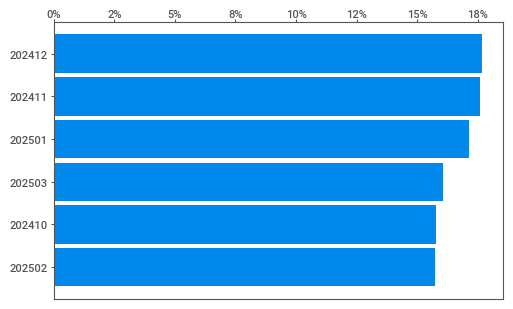

In [ ]:


#sweet_report = sv.analyze(df_bureal)
sweet_report = sv.analyze(df_bureal, target_feat = 'FPD') #com target
sweet_report.show_html('sweetviz_repor_bureal_target.html')

### **PANDAS PROFILE Report**

In [ ]:


profile = ProfileReport(df_bureal, title="YData Profiling Report")
profile.to_file("ydata_profiling_report.html")

The Sweetviz report has been generated and saved as `sweetviz_report.html`. You can download and view it from the file browser on the left panel.

# **SANITY CHECK**

In [ ]:
#gerando metadados
generate_metadata(df_bureal)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,SAFRA,object,0,0.00,6
1,FLAG_INSTALACAO,object,0,0.00,1
2,FPD,object,0,0.00,2
3,PROD,object,0,0.00,1
4,flag_mig2,object,0,0.00,1
5,SCORE_01,object,9439,0.73,298
6,SCORE_02,object,576,0.04,585
7,NUM_CPF,object,0,0.00,1272095


**INSIGHTS:**
1) Todas colunas da tabela estão como tipo object, será análisada os dados de cada coluna e designar o tipo de dados mais adequado.
2) SCORE_01 E SCORE_02 são as únicas colunas com missing, mas a % não é signifcativa.

**INSIGHT 1)**

In [ ]:
#Alterando os tipos de dados originais para tipos mais adequados para análise dos dados:
df_bureal['FPD'] = df_bureal['FPD'].astype(int) #alterando para int por ser o target binario
df_bureal['SCORE_01'] = pd.to_numeric(df_bureal['SCORE_01'], errors='coerce').astype(pd.Int64Dtype()) #devido a variaveis null na coluna
df_bureal['SCORE_02'] = pd.to_numeric(df_bureal['SCORE_02'], errors='coerce').astype(pd.Int64Dtype()) #devido a variaveis null na coluna

In [ ]:
#verificando se os tipos de dados foram modificados
df_bureal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290526 entries, 0 to 1290525
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   SAFRA            1290526 non-null  object
 1   FLAG_INSTALACAO  1290526 non-null  object
 2   FPD              1290526 non-null  int64 
 3   PROD             1290526 non-null  object
 4   flag_mig2        1290526 non-null  object
 5   SCORE_01         1281087 non-null  Int64 
 6   SCORE_02         1289950 non-null  Int64 
 7   NUM_CPF          1290526 non-null  object
dtypes: Int64(2), int64(1), object(5)
memory usage: 81.2+ MB


# **ANALISE UNIVARIADA**

In [ ]:
#gerandos estatisticas gerais da tabela:
df_bureal.describe(include='all')

,SAFRA,FLAG_INSTALACAO,FPD,PROD,flag_mig2,SCORE_01,SCORE_02,NUM_CPF
count,1290526,1290526,1290526.00,1290526,1290526,1281087.00,1289950.00,1290526
unique,6,1,NaN,1,1,<NA>,<NA>,1272095
top,202412,1,NaN,CMV,PRE,<NA>,<NA>,ZW9TYZXTWTZ
freq,227985,1290526,NaN,1290526,1290526,<NA>,<NA>,5
mean,NaN,NaN,0.24,NaN,NaN,586.90,627.55,NaN
std,NaN,NaN,0.42,NaN,NaN,57.48,96.08,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,1.00,NaN
25%,NaN,NaN,0.00,NaN,NaN,554.00,557.00,NaN
50%,NaN,NaN,0.00,NaN,NaN,587.00,622.00,NaN
75%,NaN,NaN,0.00,NaN,NaN,621.00,696.00,NaN


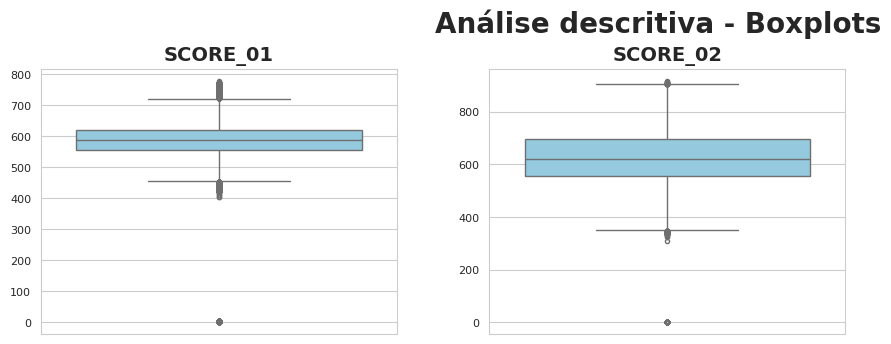

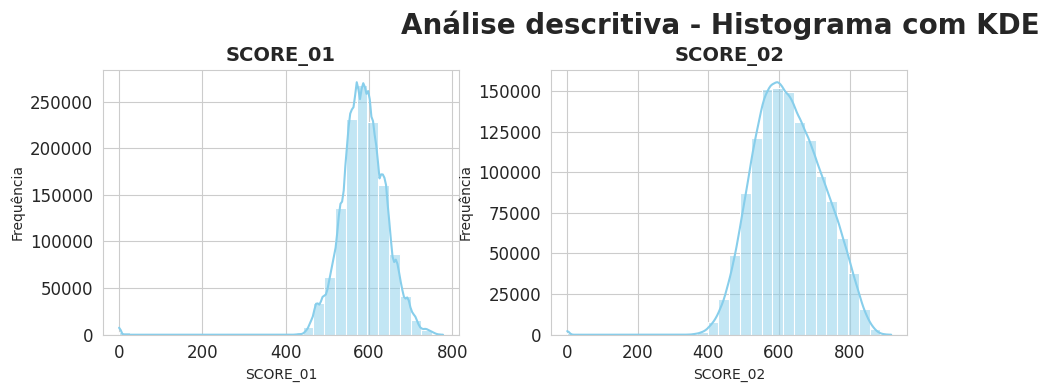

In [ ]:
#alterando a variável FPD para categórica para fazer sentido para analise gráfica
df_bureal['FPD'] = df_bureal['FPD'].astype('object')
#gerando box plot e histograma para variáveis númericas
boxplots_var_num(df_bureal)
histograms_var_num(df_bureal)

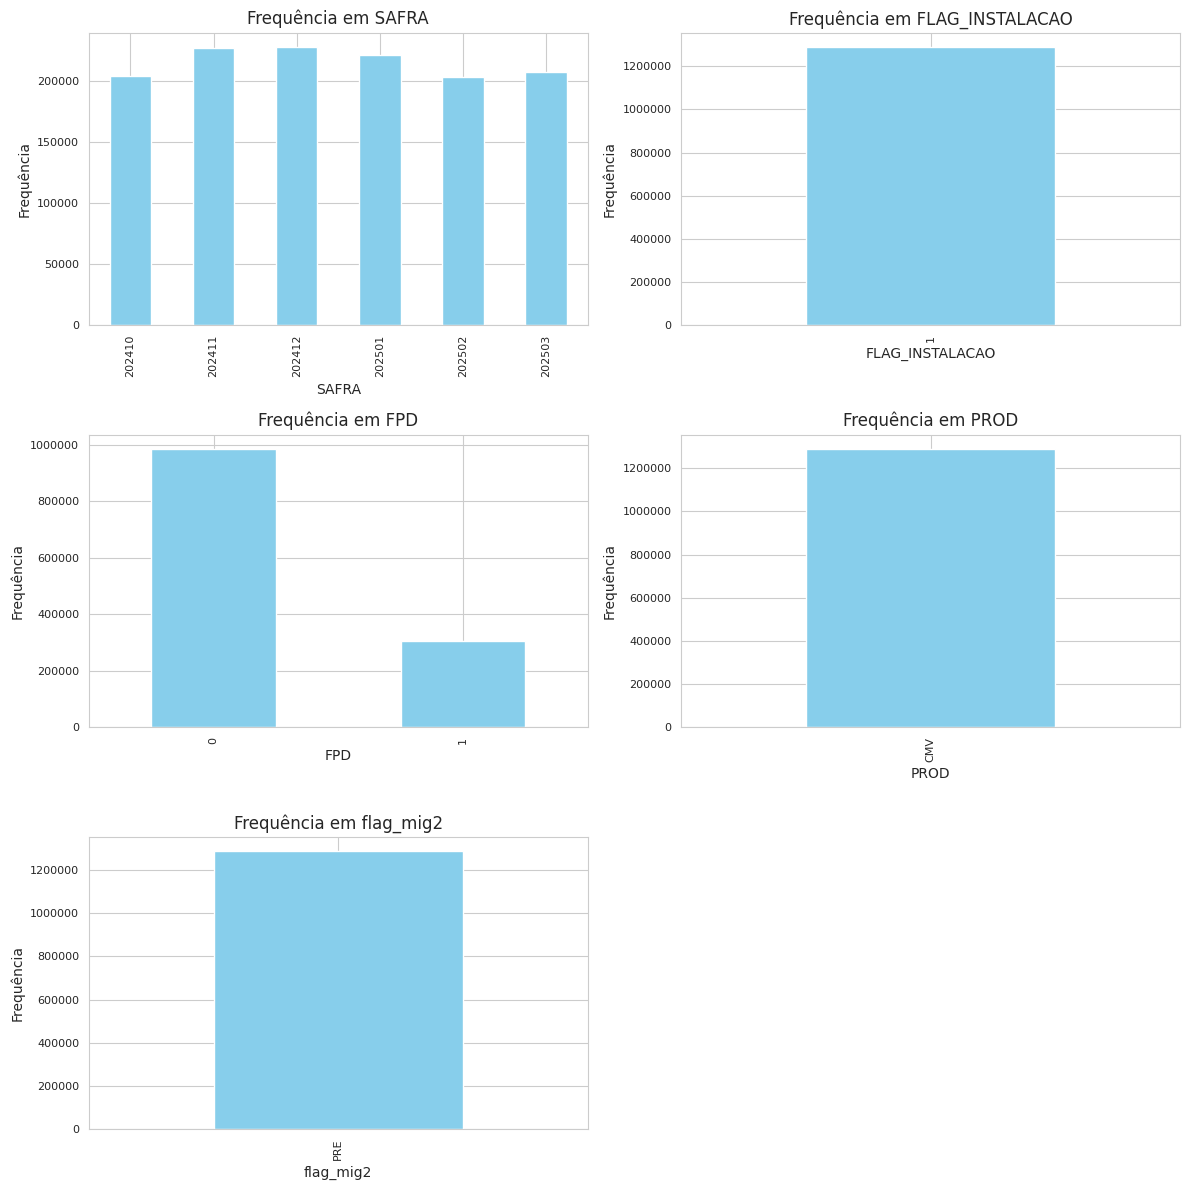

In [ ]:
plot_categorical_frequency_pt(df_bureal, corte_cardinalidade=30, graficos_por_linha=2)

**INSIGHTS:**

**-Flag_Instalação, PROD E flag_mig2 são colunas que possuem cardinadilidade 1, ou seja, não são relevantes para o modelo e devem ser removidas para não sobrecarregar tempo de processamento**
- Temos 6 Safras na base de dados (6 meses) - OUT 24 ATÉ MARÇO 25
- A taxa de inadimplência dos clientes é de 24% (FDP)

**Score 1**:
  - A média é bem próxima da moda, o que indica que provavelmente a curva de probabilidade dessa variável é próxima de uma normal e que a distrbuição dos dados é simétrica
  - O desvio Padrão é maior que do bureal 1 mas também é pequeno, o que mostra que os clientes possuem uma baixa variabilidade no score.
  - O Score médio das pessoas do Bureal 1 é de 586,90
  - O Score máximo é de 778
  - 25% dos cliente tem Score até 554, 50% tem Score até 587, 75% tem score 621.

  **- O Score minimo é de 0, o que talvez signifique que existem mais informações erradas nessa coluna além das linhas de missing (Verificar com Negócio)**
  - Existem Outliers pelo boxplot, porém, o fato da variabilidade dos dados ser pquena pode signficar que não necessariamente é um problema. Mas o A valor minimo do Score 0 indica que pelo menos esses outliers devem ser um desvio de qualidade do dado.

**Score 2:**
  - A média é bem próxima da moda, o que indica que provavelmente a curva de probabilidade dessa variável é próxima de uma normal e que a distrbuição dos dados é simétrica
   - O desvio Padrão é pequeno, o que mostra que os clientes possuem uma baixa variabilidade no score.
  - 25% dos cliente tem Score até 557, 50% tem Score até 622, 75% tem score 696
  - O Score médio das pessoas do Bureal 2 é de 627,55
  - O Score máximo é de 917

  **- O Score minimo é de 1,o que talvez signifique que existem mais informações erradas nessa coluna além das linhas de missing (Verificar com Negócio)**

  - Existem Outliers pelo boxplot, porém, o fato da variabilidade dos dados ser pquena pode signficar que não necessariamente é um problema. Mas o A valor minimo do Score 1 indica que pelo menos esses outliers devem ser um desvio de qualidade do dado.


**- Existem CPF's que se repetem na tabela, será verificado o motivo dessa repetição uma vez que o modelo a ser desenvolvido é na granularidade CPF.**

In [ ]:
#eliminando da tabela as colunas com cardinalidade 1:
df_bureal = df_bureal.drop(['FLAG_INSTALACAO', 'PROD', 'flag_mig2'], axis=1)
df_bureal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290526 entries, 0 to 1290525
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   SAFRA     1290526 non-null  object
 1   FPD       1290526 non-null  int64 
 2   SCORE_01  1281087 non-null  Int64 
 3   SCORE_02  1289950 non-null  Int64 
 4   NUM_CPF   1290526 non-null  object
dtypes: Int64(2), int64(1), object(2)
memory usage: 51.7+ MB


In [ ]:
#verificando linhas com CPFs duplicados
cpf_counts = df_bureal['NUM_CPF'].value_counts()
duplicated_cpfs = cpf_counts[cpf_counts > 1].index

df_duplicated_cpf = df_bureal[df_bureal['NUM_CPF'].isin(duplicated_cpfs)]

print(f"Número de linhas com CPFs duplicados: {len(df_duplicated_cpf)}")
display(df_duplicated_cpf)

Número de linhas com CPFs duplicados: 36379


,SAFRA,FPD,SCORE_01,SCORE_02,NUM_CPF
14,202410,1,548,612,ZZZZYNX9XYX
42,202410,1,551,431,ZZZZNZXNYUW
47,202410,1,557,496,ZZZZN897YNN
87,202410,0,594,572,ZZZXY9XUT9Y
110,202410,1,572,577,ZZZXT77YXY8
...,...,...,...,...,...
1290367,202503,1,583,674,998Z7U9XXWU
1290382,202503,0,547,566,998YW7XWYZZ
1290443,202503,1,570,492,9989NZZXNWU
1290473,202503,0,539,507,999U8W7ZWN8


In [ ]:
'''verificando hipótese craindo uma tabela com os CPFs repetidos, outra coluna com o número de linhas que o CPF aparece,
e outra mostrando quantas safras diferentes tem esse mesmo CPF, caso os número sejam iguais, a hipótese é verdadeira.
'''
cpf_safra_summary = df_duplicated_cpf.groupby('NUM_CPF').agg(
    count_cpf=('NUM_CPF', 'size'),
    unique_safras=('SAFRA', 'nunique')
).reset_index()

cpf_safra_summary['diff_count_unique_safra'] = cpf_safra_summary['count_cpf'] - cpf_safra_summary['unique_safras']

display(cpf_safra_summary.sort_values(by='count_cpf', ascending=False))

,NUM_CPF,count_cpf,unique_safras,diff_count_unique_safra
14632,ZW9TYZXTWTZ,5,5,0
16796,ZYWUTZXXTU8,4,4,0
8048,XWYWZZZNNNN,4,4,0
13206,ZTU8UZXYWWW,4,4,0
11519,Z8Y88ZX77ZW,4,4,0
...,...,...,...,...
6057,WU997NYY8TZ,2,2,0
6056,WU98Y8YTU9X,2,2,0
6055,WU98XXTZ8XU,2,2,0
6054,WU97XUZ8WZU,2,2,0


In [ ]:
sum_diff_count_unique_safra = cpf_safra_summary['diff_count_unique_safra'].sum()
print(f"The sum of 'diff_count_unique_safra' column is: {sum_diff_count_unique_safra}")

The sum of 'diff_count_unique_safra' column is: 0


In [ ]:
#filtrando 1 dos CPfs repetidos para entender mais no detalhe
df_filtered_cpf = df_bureal[df_bureal['NUM_CPF'] == 'ZW9TYZXTWTZ']
print(f"Number of rows with NUM_CPF 'ZW9TYZXTWTZ': {len(df_filtered_cpf)}")
display(df_filtered_cpf)

Number of rows with NUM_CPF 'ZW9TYZXTWTZ': 5


,SAFRA,FPD,SCORE_01,SCORE_02,NUM_CPF
244507,202411,1,457,400,ZW9TYZXTWTZ
472508,202412,1,457,400,ZW9TYZXTWTZ
699560,202501,1,457,396,ZW9TYZXTWTZ
916686,202502,1,427,428,ZW9TYZXTWTZ
1121067,202503,1,427,404,ZW9TYZXTWTZ


**INSIGHT:** A REPETICAO DE CPF OCORRE DEVIDO AO MESMO CLIENTE APARECENDO EM DIFERENTES SAFRAS.

**- Pode-se perceber que o SCORE do cliente muda entre as safras. Como o modelo a ser criado é no nível de cliente, acredito que talvez devemos escolher somente 1 safra para esses clientes para analisar o cliente somente 1 vez, nesse caso, acredito que selecionar sempre a útlima safra seja uma boa saída para pegar o comportamento mais recente desse cliente.**

In [ ]:
#analisando outliers score_1 e score_2:
limites_outliers(df_bureal[['SCORE_01', 'SCORE_02']])

,Coluna,IQR,Limite Superior,Limite Inferior,Porcentagem de Outliers,Maior Valor,Menor Valor
0,SCORE_01,67,721.50,453.50,0.91,778,0
1,SCORE_02,139,904.50,348.50,0.09,917,1


In [ ]:
# Obter os limites de outliers para SCORE_01 e SCORE_02
df_limites = limites_outliers(df_bureal[['SCORE_01', 'SCORE_02']])

# SCORE_01 - Valores abaixo do Limite Inferior
score_01_limite_inferior = df_limites[df_limites['Coluna'] == 'SCORE_01']['Limite Inferior'].iloc[0]
print(f"\nFrequência de valores para SCORE_01 abaixo do Limite Inferior ({score_01_limite_inferior:.2f}):")
display(df_bureal[df_bureal['SCORE_01'] < score_01_limite_inferior]['SCORE_01'].value_counts().sort_index())

# SCORE_01 - Valores acima do Limite Superior
score_01_limite_superior = df_limites[df_limites['Coluna'] == 'SCORE_01']['Limite Superior'].iloc[0]
print(f"\nFrequência de valores para SCORE_01 acima do Limite Superior ({score_01_limite_superior:.2f}):")
display(df_bureal[df_bureal['SCORE_01'] > score_01_limite_superior]['SCORE_01'].value_counts().sort_index())

# SCORE_02 - Valores abaixo do Limite Inferior
score_02_limite_inferior = df_limites[df_limites['Coluna'] == 'SCORE_02']['Limite Inferior'].iloc[0]
print(f"\nFrequência de valores para SCORE_02 abaixo do Limite Inferior ({score_02_limite_inferior:.2f}):")
display(df_bureal[df_bureal['SCORE_02'] < score_02_limite_inferior]['SCORE_02'].value_counts().sort_index())

# SCORE_02 - Valores acima do Limite Superior
score_02_limite_superior = df_limites[df_limites['Coluna'] == 'SCORE_02']['Limite Superior'].iloc[0]
print(f"\nFrequência de valores para SCORE_02 acima do Limite Superior ({score_02_limite_superior:.2f}):")
display(df_bureal[df_bureal['SCORE_02'] > score_02_limite_superior]['SCORE_02'].value_counts().sort_index())


Frequência de valores para SCORE_01 abaixo do Limite Inferior (453.50):


,count
SCORE_01,
0,1864
2,755
402,1
403,1
410,1
411,1
417,2
418,1
420,2



Frequência de valores para SCORE_01 acima do Limite Superior (721.50):


,count
SCORE_01,
724,781
727,761
730,756
734,843
737,919
741,853
745,689
749,618
754,481



Frequência de valores para SCORE_02 abaixo do Limite Inferior (348.50):


,count
SCORE_02,
1,1048
307,1
323,1
328,1
331,1
333,1
334,3
336,2
337,2



Frequência de valores para SCORE_02 acima do Limite Superior (904.50):


,count
SCORE_02,
905,3
906,4
907,4
908,1
909,2
910,1
911,1
912,1
914,1


**INSIGHT:**

Score 1:
**- Limite Inferior posuem valores de 0 e 2 o que reforça a suspeita que além dos missing esses valores também deveriam ser desconsiderados.**

Score 2:
**- Limite Inferior possuem valores 1 o que reforça a suspeita que além dos missing esses valores também deveriam ser desconsiderados.**



#**ANÁLISE MULTIVARIDA (Entendendo relação das variáveis com o target)**

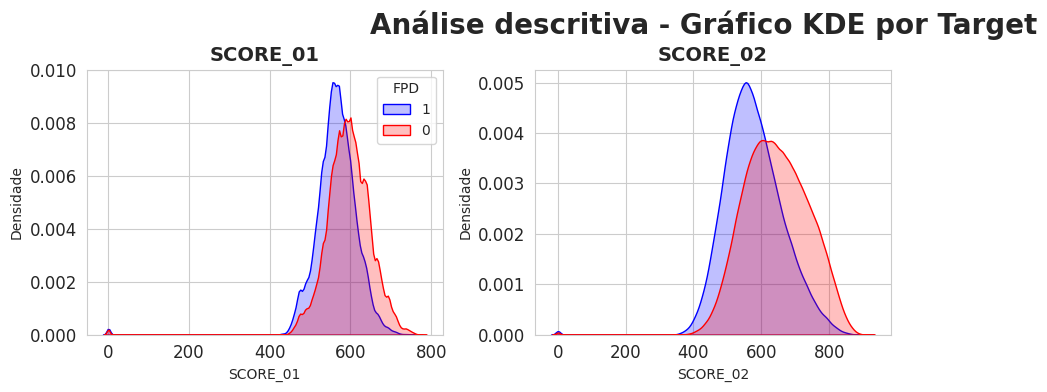

In [ ]:
# variaveis numéricas com o target
kdeplots_var_num_target(df_bureal, 'FPD')
plt.show()

**Insight:**

**- A Distribuição tanto do Score 01 quando o Score 02 em relação ao Target mostra que elas não são variáveis com grande valor preditivo, porém, em ambos o Score de quem é adimplente é ligeiramente maior do que o de quem nãp é. O que é esperado**

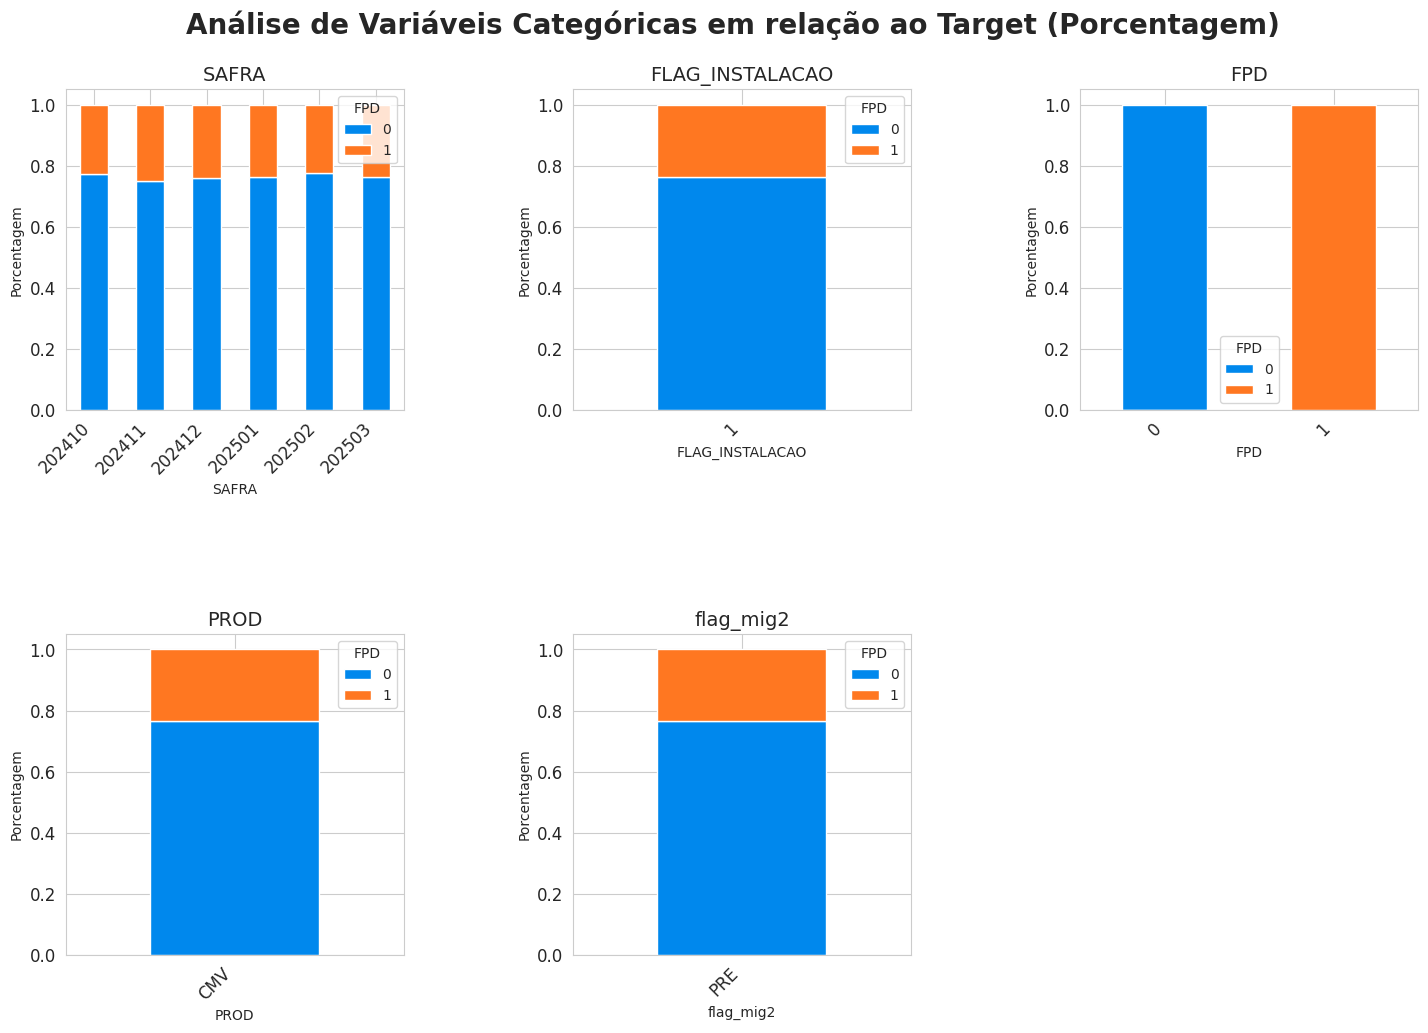

In [ ]:
#variáveis categoricas com o target
plot_cat_vs_target_percentage(df_bureal, 'FPD', cutoff=30)
plt.show()

**Insight:**

**- Safra: A taxa de inadimplentes entre as safras tem pouca variabilidade.**


# **DICIONÁRIO DE DADOS DO `df_bureal`**

| Nome da Variável  | Tipo de Dado Atual | Tipo de Dado Sugerido     | Descrição                                                                      |
|:------------------|:-------------------|:--------------------------|:-------------------------------------------------------------------------------|
| `SAFRA`           |  `object`  |  `object`   | Período de referência da observação no formato AAAAMM (Ano Mês).              |
| `FPD`             |     `object`                | `int` (category)          | É o Target do problema. Indicador de First Payment Default (Primeira Inadimplência). 1 para inadimplente, 0 para adimplente. |
| `SCORE_01`        |       `object`              | `Int64` (nullable integer)| Pontuação de crédito do Bureau 1. Reflete o risco de crédito do cliente.       |
| `SCORE_02`        |        `object`             | `Int64` (nullable integer)| Pontuação de crédito do Bureau 2. Reflete o risco de crédito do cliente.       |
| `NUM_CPF`         |        `object`             | `object` (category)       | Número de CPF anonimizado do cliente. Usado como identificador único.          |